#Problem Statement
ABC is committed to its Green Future initiative and requires data visualizations to assess and optimize energy consumption across its managed buildings. The goal is to provide insights for informed decision-making regarding energy efficiency.

 Key tasks:

1. Heatmap: Energy Consumption per Floor Area by Region and Building Type
*   Create a color-coded matrix to visualize energy consumption efficiency.
*   Highlight patterns or anomalies between different building types and regions.

2. Correlation Plot: Floor Area, Occupancy Rates, and Energy Consumption
*  Plot the correlation between these variables.
*  Provide insights on how they relate and affect energy consumption.

3. Trend Analysis: Energy Consumption Over Time by Region and Building Type

*  Present energy consumption trends over time.
*  Identify patterns or shifts in energy efficiency for different regions and building types.

#Import Package

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
path_1 = "Data.xlsx"

In [4]:
df = pd.read_excel(path_1, sheet_name='Data')
df.head()

,Building_ID,Year,Building_Type,Floor_Area (m²),Energy_Consumption (kWh),Occupancy_Rate (%),Region,Energy_Score,Energy_Cost (IDR),Province,Average_Temp,Energy_Consumption_AC (kWh),Energy_Consumption_Lighting (kWh)
0,1,2022,Industrial,4941,17874,50.91,Urban,83,229490100.0,Jawa Barat,24⁰ C,14300,3574
1,2,2023,Commercial,3677,37711,54.72,Urban,17,244641180.0,Jawa Barat,20⁰ C,30169,7542
2,3,2020,Commercial,1413,10539,84.15,Rural,85,256921980.0,Jawa Barat,22⁰ C,8432,2107
3,4,2022,Commercial,2031,58351,NaN,Urban,78,150017140.0,Jawa Barat,18⁰ C,46681,11670
4,5,2022,Commercial,1713,66267,65.95,Suburban,73,147403340.0,Jawa Barat,18⁰ C,53014,13253


Data Understanding

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Building_ID                        100 non-null    int64  
 1   Year                               100 non-null    int64  
 2   Building_Type                      100 non-null    object 
 3   Floor_Area (m²)                    100 non-null    int64  
 4   Energy_Consumption (kWh)           100 non-null    int64  
 5   Occupancy_Rate (%)                 92 non-null     float64
 6   Region                             100 non-null    object 
 7   Energy_Score                       100 non-null    int64  
 8   Energy_Cost (IDR)                  100 non-null    float64
 9   Province                           100 non-null    object 
 10  Average_Temp                       100 non-null    object 
 11  Energy_Consumption_AC (kWh)        100 non-null    int64  


In [6]:
df_sorted = df.sort_values(by='Floor_Area (m²)', ascending=True)
df_sorted.head(5)

,Building_ID,Year,Building_Type,Floor_Area (m²),Energy_Consumption (kWh),Occupancy_Rate (%),Region,Energy_Score,Energy_Cost (IDR),Province,Average_Temp,Energy_Consumption_AC (kWh),Energy_Consumption_Lighting (kWh)
6,7,2020,Commercial,-2088,7557,51.16,Rural,51,186890340.0,Jawa Barat,24⁰ C,6046,1511
25,26,2021,Residential,-1903,27399,92.92,Rural,54,218818320.0,Jawa Timur,24⁰ C,13700,13699
67,68,2020,Industrial,196,8420,85.31,Urban,17,140130200.0,Others,18⁰ C,6736,1684
53,54,2023,Industrial,247,50714,52.88,Urban,38,267994160.0,Jawa Barat,15⁰ C,40572,10142
45,46,2023,Commercial,252,53404,64.66,Suburban,82,122781540.0,Jawa Tengah,15⁰ C,42724,10680


In [7]:
df_sorted = df.sort_values(by='Energy_Consumption_Lighting (kWh)', ascending=False)
df_sorted.head(10)

,Building_ID,Year,Building_Type,Floor_Area (m²),Energy_Consumption (kWh),Occupancy_Rate (%),Region,Energy_Score,Energy_Cost (IDR),Province,Average_Temp,Energy_Consumption_AC (kWh),Energy_Consumption_Lighting (kWh)
17,18,2023,Residential,4829,99179,87.53,Rural,39,90219920.0,Jawa Timur,18⁰ C,49590,49589
50,51,2022,Residential,4439,98179,NaN,Rural,63,204082480.0,Jawa Barat,18⁰ C,49090,49089
21,22,2020,Residential,3793,96412,68.60,Suburban,3,232811740.0,Jawa Timur,18⁰ C,48206,48206
22,23,2021,Residential,1545,91831,88.82,Rural,50,109810680.0,Jawa Timur,18⁰ C,45916,45915
36,37,2023,Residential,4147,84909,50.54,Suburban,66,99906380.0,Jawa Tengah,18⁰ C,42455,42454
95,96,2021,Residential,4549,83069,64.29,Urban,50,269676680.0,JawaTimur,20⁰ C,41535,41534
13,14,2022,Residential,759,82505,NaN,Urban,34,167822480.0,Jawa Barat,16⁰ C,41253,41252
55,56,2023,Residential,3632,78744,72.08,Suburban,88,161458220.0,Jawa Barat,18⁰ C,39372,39372
84,85,2022,Residential,3693,77991,74.63,Urban,8,184883580.0,Others,18⁰ C,38996,38995
28,29,2023,Residential,3631,75271,NaN,Urban,94,36702400.0,Jawa Timur,18⁰ C,37636,37635


In [8]:
df.columns

Index(['Building_ID', 'Year', 'Building_Type', 'Floor_Area (m²)',
       'Energy_Consumption (kWh)', 'Occupancy_Rate (%)', 'Region',
       'Energy_Score', 'Energy_Cost (IDR)', 'Province', 'Average_Temp',
       'Energy_Consumption_AC (kWh)', 'Energy_Consumption_Lighting (kWh)'],
      dtype='object')

In [9]:
df.duplicated().sum()

0

In [10]:
df.describe()

,Building_ID,Year,Floor_Area (m²),Energy_Consumption (kWh),Occupancy_Rate (%),Energy_Score,Energy_Cost (IDR),Energy_Consumption_AC (kWh),Energy_Consumption_Lighting (kWh)
count,100.000000,100.000000,100.000000,1.000000e+02,92.000000,100.000000,1.000000e+02,100.000000,100.000000
mean,50.500000,2021.640000,2609.030000,6.831871e+04,75.063804,52.380000,1.411814e+08,33920.990000,15213.410000
std,29.011492,1.114822,1483.501723,1.969609e+05,15.864354,29.175464,7.585187e+07,19701.969824,11970.834621
min,1.000000,2020.000000,-2088.000000,5.301000e+03,50.540000,1.000000,1.782872e+07,3935.000000,1060.000000
25%,25.750000,2021.000000,1659.250000,2.480700e+04,60.172500,28.500000,7.777444e+07,17033.000000,7432.500000
50%,50.500000,2022.000000,2844.000000,5.038050e+04,74.675000,53.500000,1.489257e+08,33996.500000,12022.000000
75%,75.250000,2023.000000,3706.250000,7.113750e+04,89.727500,77.250000,1.995276e+08,47493.750000,18917.500000
max,100.000000,2023.000000,4981.000000,2.000000e+06,99.530000,98.000000,2.735767e+08,79728.000000,49589.000000


#Data Preprocessing dan Cleaning

In [11]:
negative_values_count = (df['Floor_Area (m²)'] < 0).sum()
print(f'Count of negative value in Floor_Area (m²): {negative_values_count}')

Count of negative value in Floor_Area (m²): 2


In [12]:
df['Floor_Area (m²)'] = df['Floor_Area (m²)'].abs()

In [13]:
negative_values_count = (df['Floor_Area (m²)'] < 0).sum()
print(f'Count of negative value in Floor_Area (m²): {negative_values_count}')

Count of negative value in Floor_Area (m²): 0


1. Missing Value

In [14]:
missing_data = df.isnull().sum()
missing_data

,0
Building_ID,0
Year,0
Building_Type,0
Floor_Area (m²),0
Energy_Consumption (kWh),0
Occupancy_Rate (%),8
Region,0
Energy_Score,0
Energy_Cost (IDR),0
Province,0


2. Identification dan solving outlier use IQR method.

In [15]:
print(df.dtypes)

Building_ID                            int64
Year                                   int64
Building_Type                         object
Floor_Area (m²)                        int64
Energy_Consumption (kWh)               int64
Occupancy_Rate (%)                   float64
Region                                object
Energy_Score                           int64
Energy_Cost (IDR)                    float64
Province                              object
Average_Temp                          object
Energy_Consumption_AC (kWh)            int64
Energy_Consumption_Lighting (kWh)      int64
dtype: object


In [16]:
df_numerik = df.select_dtypes(include='number').drop(columns=['Building_ID', 'Year'], errors='ignore')

In [17]:
Q1 = df_numerik.quantile(0.25)
Q3 = df_numerik.quantile(0.75)
IQR = Q3 - Q1

# Outlier Detection
outliers = df_numerik[((df_numerik < (Q1 - 1.5 * IQR)) | (df_numerik > (Q3 + 1.5 * IQR))).any(axis=1)]


In [18]:
print(outliers)

    Floor_Area (m²)  Energy_Consumption (kWh)  Occupancy_Rate (%)  \
13              759                     82505                 NaN   
17             4829                     99179               87.53   
21             3793                     96412               68.60   
22             1545                     91831               88.82   
28             3631                     75271                 NaN   
36             4147                     84909               50.54   
50             4439                     98179                 NaN   
55             3632                     78744               72.08   
82              673                   2000000               95.32   
84             3693                     77991               74.63   
95             4549                     83069               64.29   

    Energy_Score  Energy_Cost (IDR)  Energy_Consumption_AC (kWh)  \
13            34        167822480.0                        41253   
17            39         90219920.0

before droping outlier

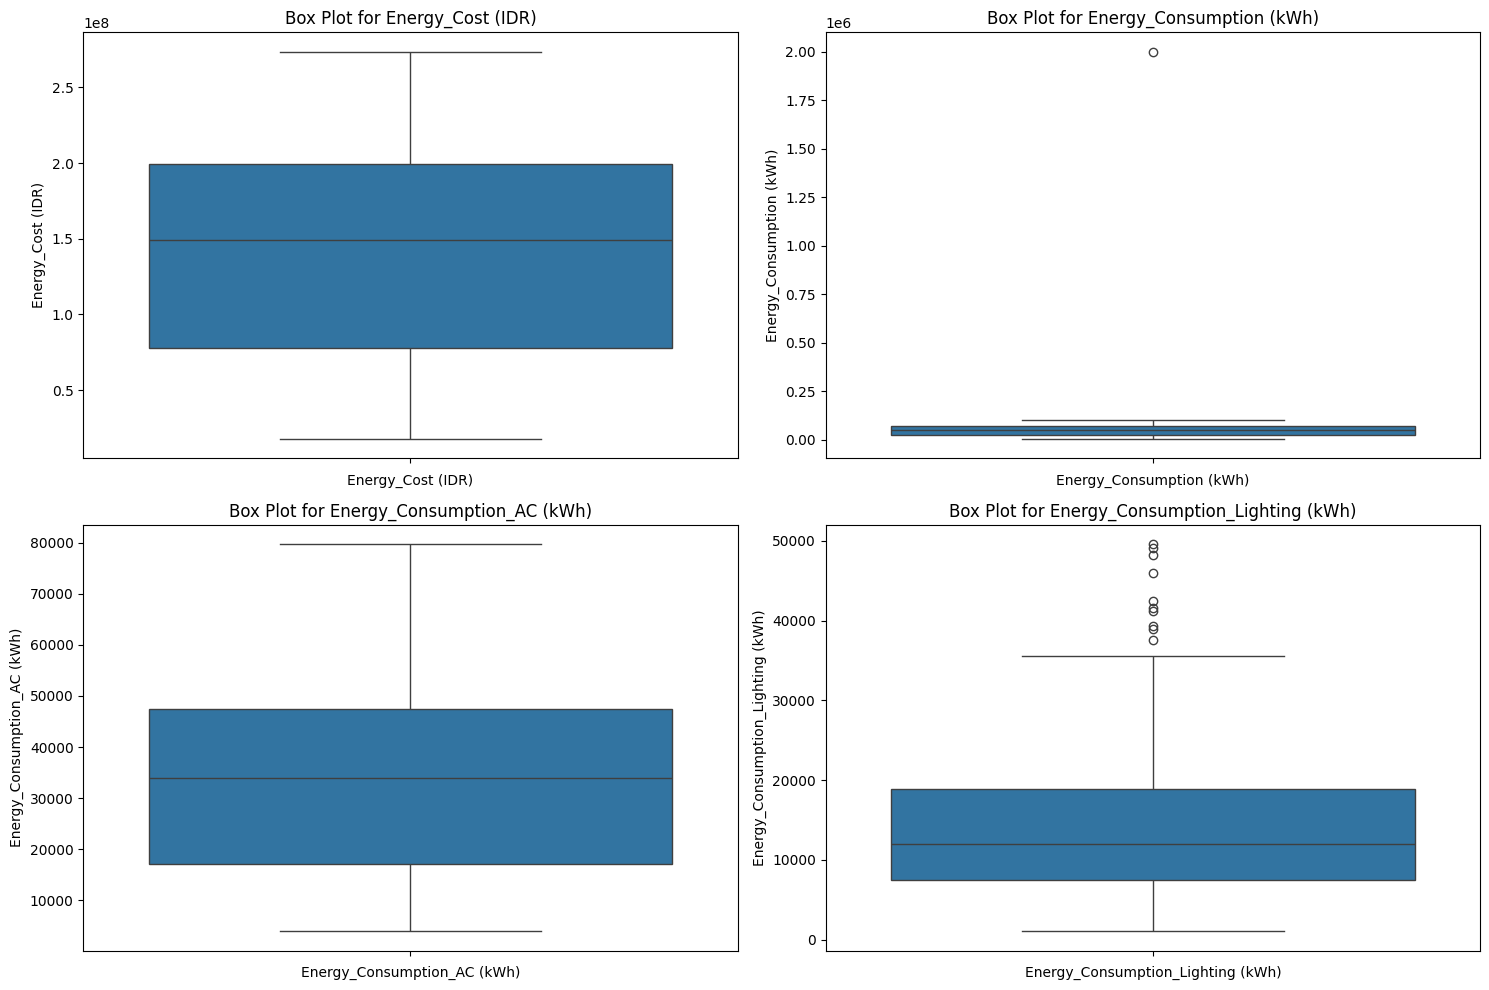

In [19]:
columns_to_visualize = [
    'Energy_Cost (IDR)',
    'Energy_Consumption (kWh)',
    'Energy_Consumption_AC (kWh)',
    'Energy_Consumption_Lighting (kWh)'
]

# Visualization from df_cleaned
plt.figure(figsize=(15, 10))

for i, column in enumerate(columns_to_visualize, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df[column])
    plt.title(f'Box Plot for {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

Experiment 1 for data cleaned , drop only index 82

In [20]:
#drop Outliers
df_cleaned = df.drop(index=82)

Experiment 2 for data cleaned 2 , drop all outliers

In [21]:
df_cleaned2 = df[~df.index.isin(outliers.index)]

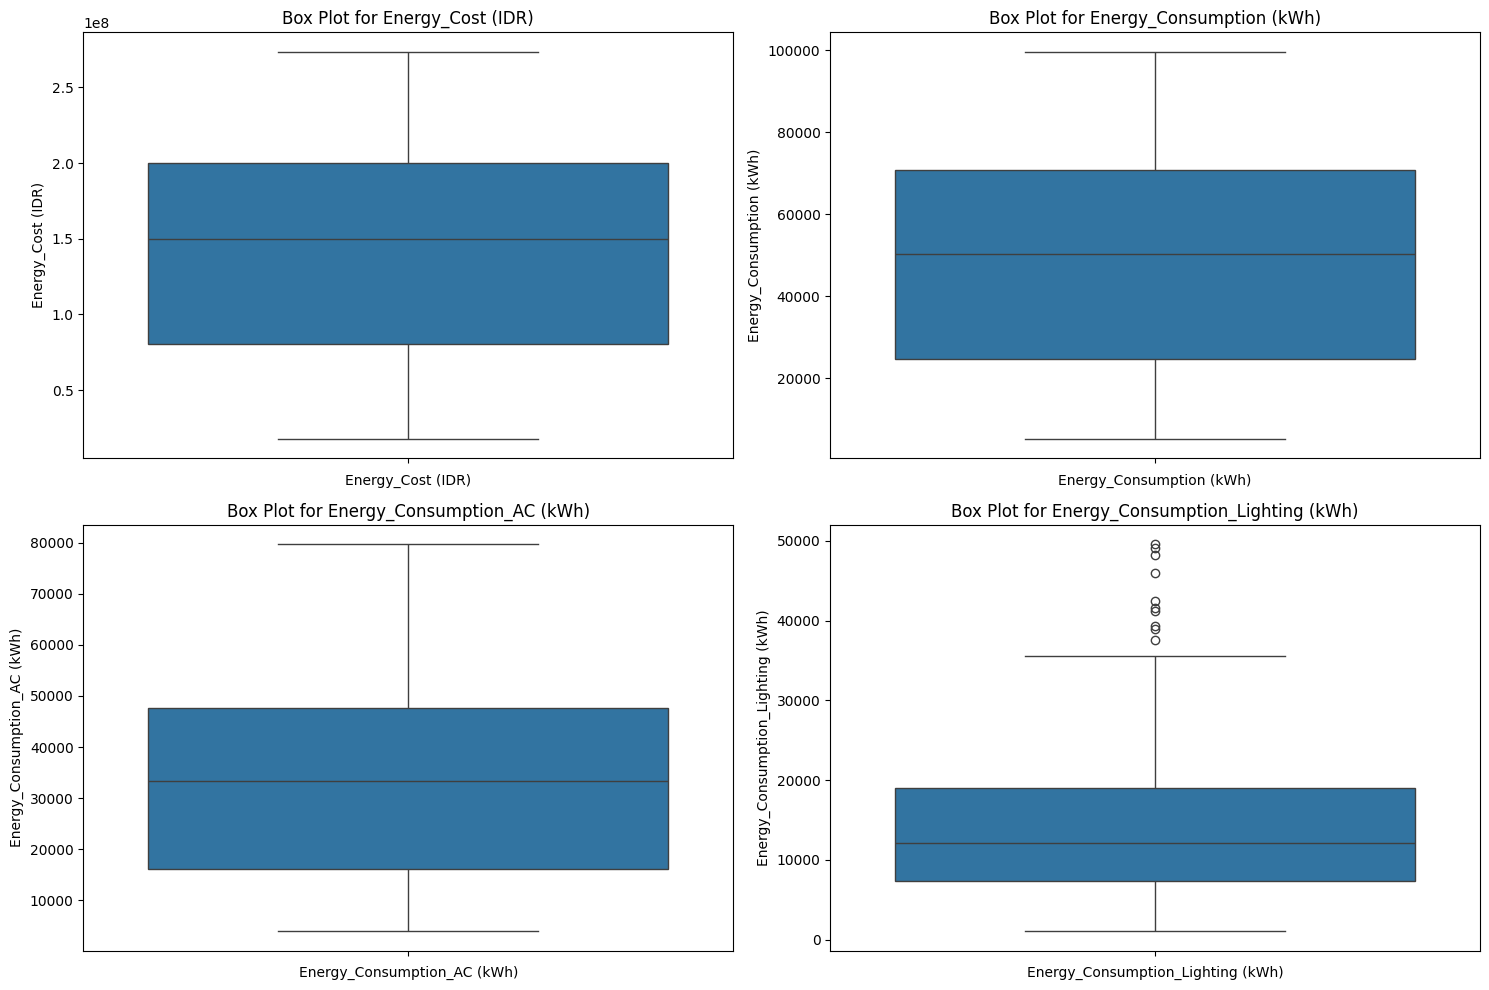

In [22]:
columns_to_visualize = [
    'Energy_Cost (IDR)',
    'Energy_Consumption (kWh)',
    'Energy_Consumption_AC (kWh)',
    'Energy_Consumption_Lighting (kWh)'
]

# Visualization from df_cleaned
plt.figure(figsize=(15, 10))

for i, column in enumerate(columns_to_visualize, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df_cleaned[column])
    plt.title(f'Box Plot for {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()


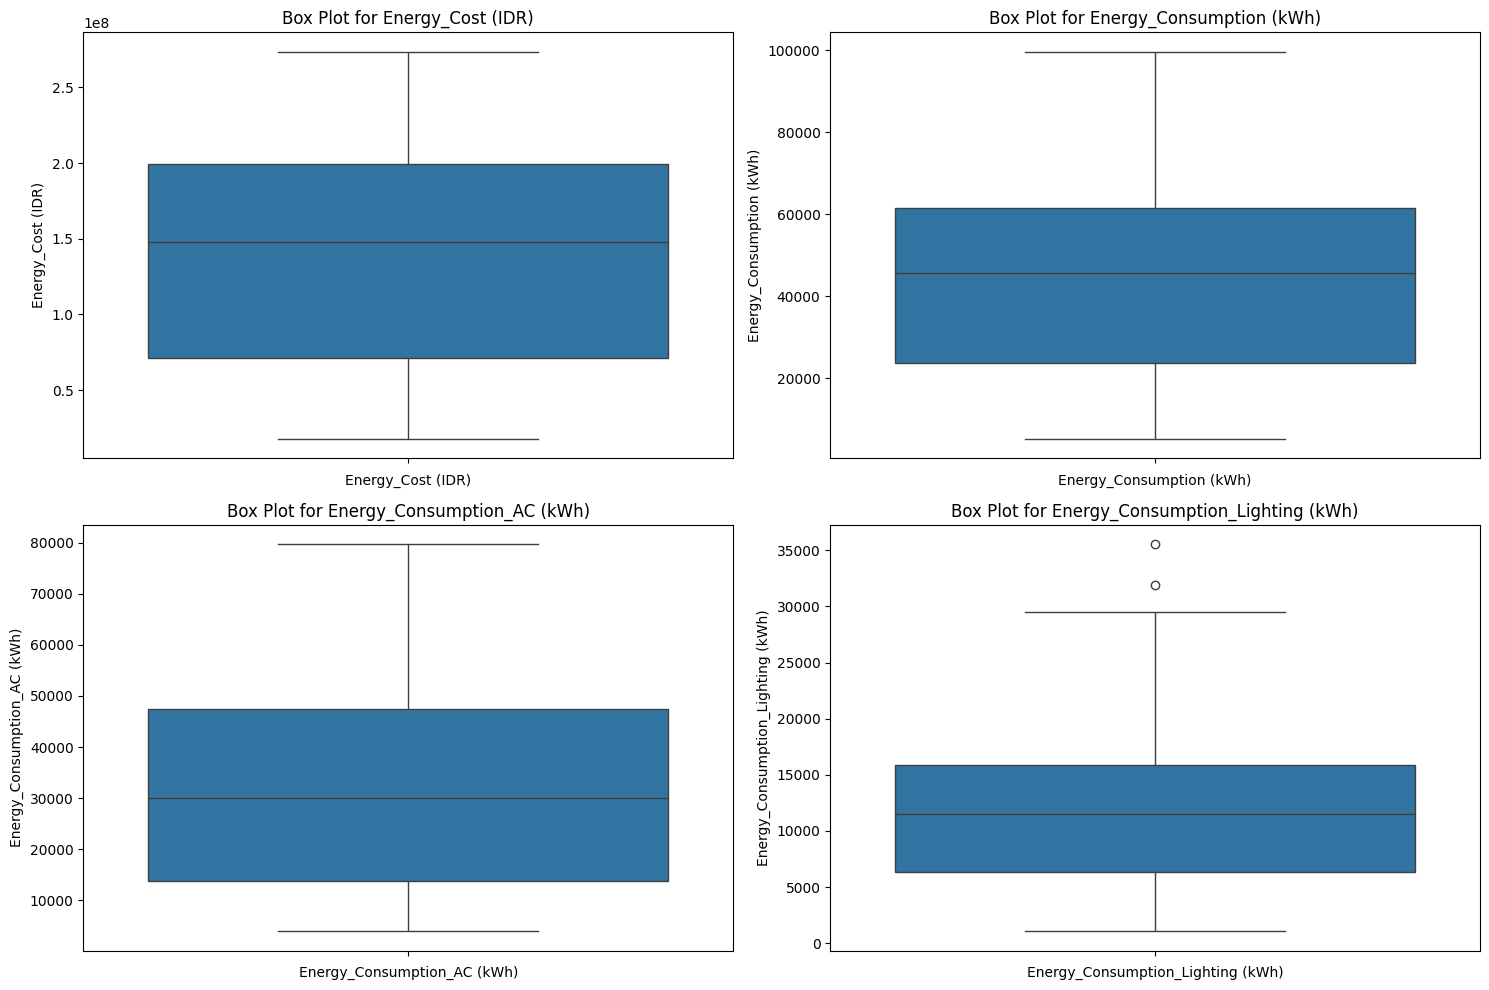

In [23]:
columns_to_visualize = [
    'Energy_Cost (IDR)',
    'Energy_Consumption (kWh)',
    'Energy_Consumption_AC (kWh)',
    'Energy_Consumption_Lighting (kWh)'
]

# Visualization from df_cleaned
plt.figure(figsize=(15, 10))

for i, column in enumerate(columns_to_visualize, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df_cleaned2[column])
    plt.title(f'Box Plot for {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()


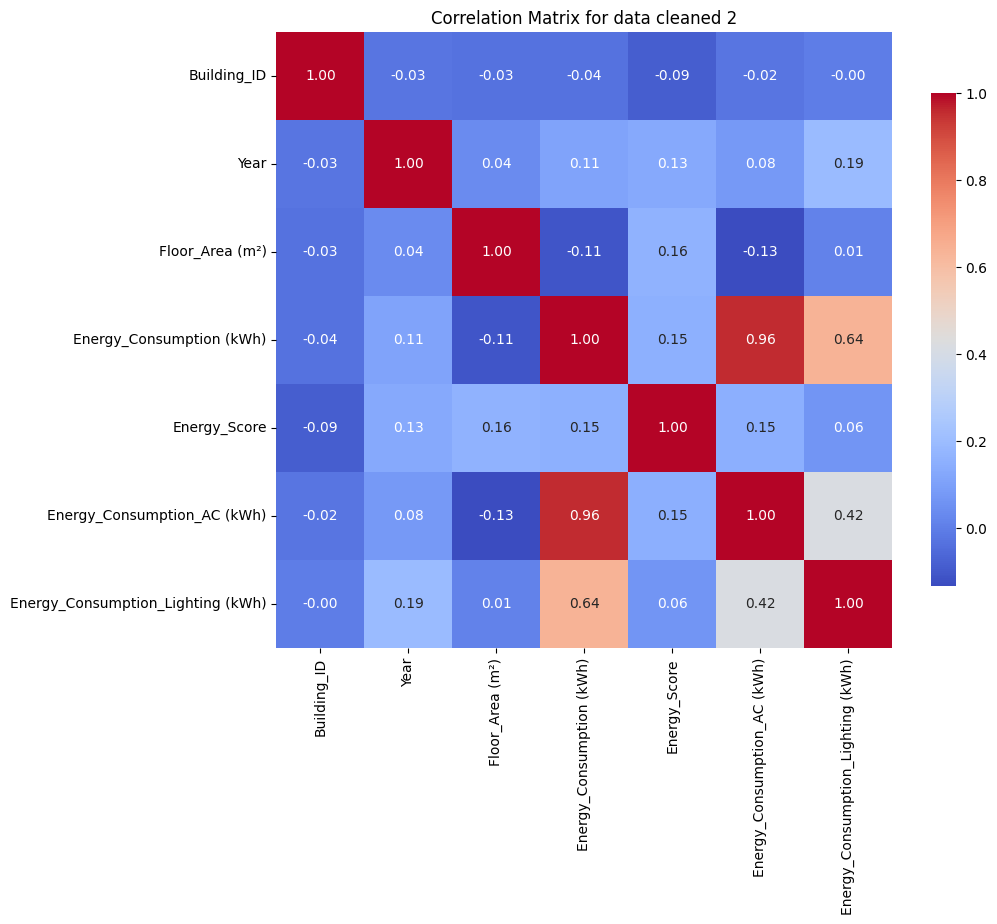

In [24]:
df_int2 = df_cleaned2.select_dtypes(include='int')
correlation_matrix = df_int2.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix for data cleaned 2')
plt.show()

Fill up the null with median

In [45]:
print(df_cleaned['Occupancy_Rate (%)'].isnull().sum())

8


In [46]:
median_value = df_cleaned['Occupancy_Rate (%)'].median()
df['Occupancy_Rate (%)'].fillna(median_value, inplace=True)

In [47]:
print(df_cleaned['Occupancy_Rate (%)'].isnull().sum())

8


In [48]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99 entries, 0 to 99
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Building_ID                        99 non-null     int64  
 1   Year                               99 non-null     int64  
 2   Building_Type                      99 non-null     object 
 3   Floor_Area (m²)                    99 non-null     int64  
 4   Energy_Consumption (kWh)           99 non-null     int64  
 5   Occupancy_Rate (%)                 91 non-null     float64
 6   Region                             99 non-null     object 
 7   Energy_Score                       99 non-null     int64  
 8   Energy_Cost (IDR)                  99 non-null     float64
 9   Province                           99 non-null     object 
 10  Average_Temp                       99 non-null     float64
 11  Energy_Consumption_AC (kWh)        99 non-null     int64  
 12  E

#EDA

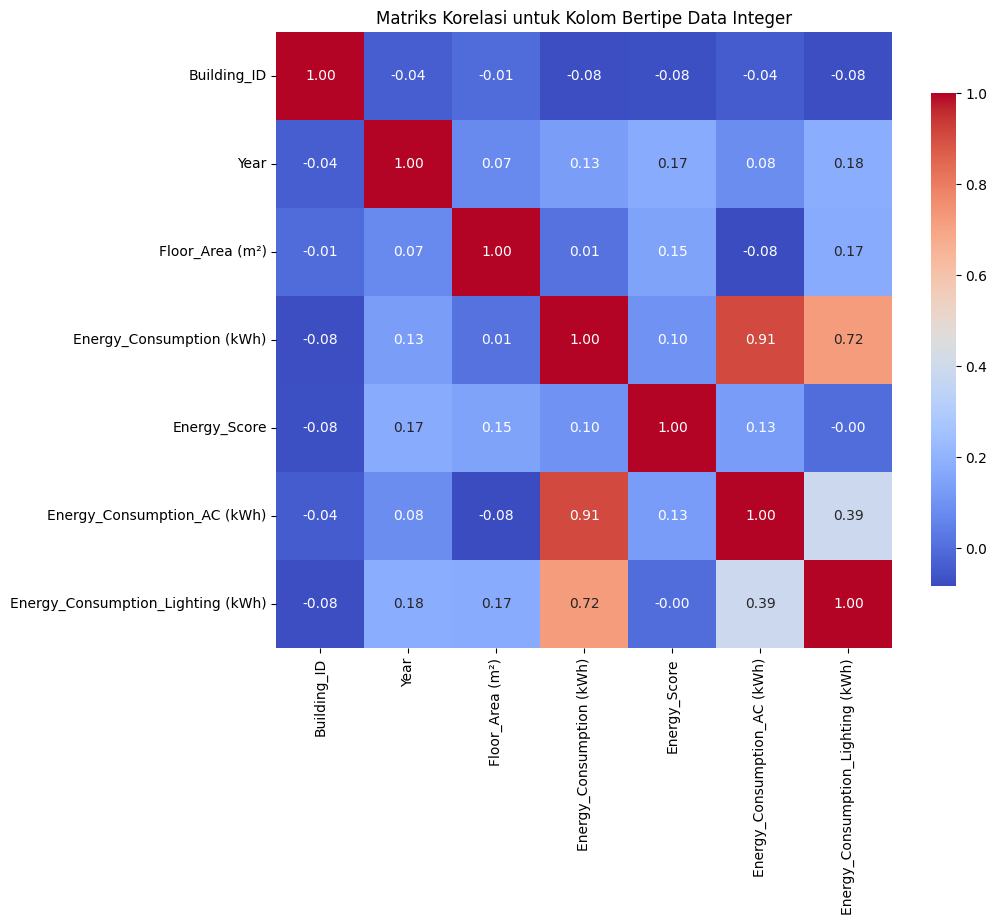

In [49]:
df_int = df_cleaned.select_dtypes(include='int')
correlation_matrix = df_int.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar_kws={"shrink": .8})
plt.title('Matriks Korelasi untuk Kolom Bertipe Data Integer')
plt.show()

1. Showing province has the highest energy consumption on average

In [50]:
avg_energy_by_province = df_cleaned.groupby('Province')['Energy_Consumption (kWh)'].mean().sort_values(ascending=False)

Describing the energy consumption per sqm profile of each building type and compare them with one another.

In [51]:

df_cleaned['Energy_Per_Sqm'] = df_cleaned['Energy_Consumption (kWh)'] / df_cleaned['Floor_Area (m²)']
avg_energy_per_sqm_by_type = df_cleaned.groupby('Building_Type')['Energy_Per_Sqm'].mean()

Showing any correlation between average temperature of a building and its energy consumption.

In [52]:
unique_values = df_cleaned['Average_Temp'].unique()
print(unique_values)


[24.         20.         22.         18.          0.         16.
 22.22222222 15.        ]


In [53]:
def convert_to_celsius(temp):
    if '⁰ F' in temp:
        fahrenheit = float(temp.replace('⁰ F', '').strip())
        return (fahrenheit - 32) * 5 / 9
    elif '⁰ C' in temp:
        return float(temp.replace('⁰ C', '').strip())
    return None

In [ ]:
df_cleaned['Average_Temp'] = df_cleaned['Average_Temp'].apply(convert_to_celsius)

In [55]:
print(df_cleaned['Average_Temp'].head())

0    24.0
1    20.0
2    22.0
3    18.0
4    18.0
Name: Average_Temp, dtype: float64


In [56]:
correlation_temp_energy = df_cleaned[['Average_Temp', 'Energy_Consumption (kWh)']].corr()

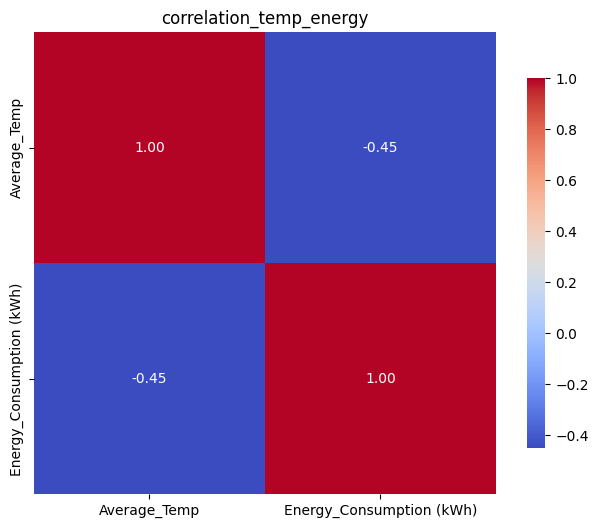

In [57]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_temp_energy, annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar_kws={"shrink": .8})
plt.title('correlation_temp_energy')
plt.show()

In [59]:
print("Missing Data:", missing_data)
print("\nAverage Energy Consumption by Province:", avg_energy_by_province)
print("\nEnergy Consumption per Sqm by Building Type:", avg_energy_per_sqm_by_type)
print("\nCorrelation between Temperature and Energy Consumption:", correlation_temp_energy)

Missing Data: Building_ID                          0
Year                                 0
Building_Type                        0
Floor_Area (m²)                      0
Energy_Consumption (kWh)             0
Occupancy_Rate (%)                   8
Region                               0
Energy_Score                         0
Energy_Cost (IDR)                    0
Province                             0
Average_Temp                         0
Energy_Consumption_AC (kWh)          0
Energy_Consumption_Lighting (kWh)    0
dtype: int64

Average Energy Consumption by Province: Province
JawaTimur      71408.500000
Jawa Timur     54863.541667
Jawa Barat     50758.956522
Others         45037.241379
Jawa Tengah    44950.722222
Other          29893.333333
Name: Energy_Consumption (kWh), dtype: float64

Energy Consumption per Sqm by Building Type: Building_Type
Commercial     39.612179
Industrial     28.450831
Residential    24.749410
Name: Energy_Per_Sqm, dtype: float64

Correlation between Temperat

#Data Visualization

1. Heatmap: Energy Consumption per Floor Area by Region and Building Type

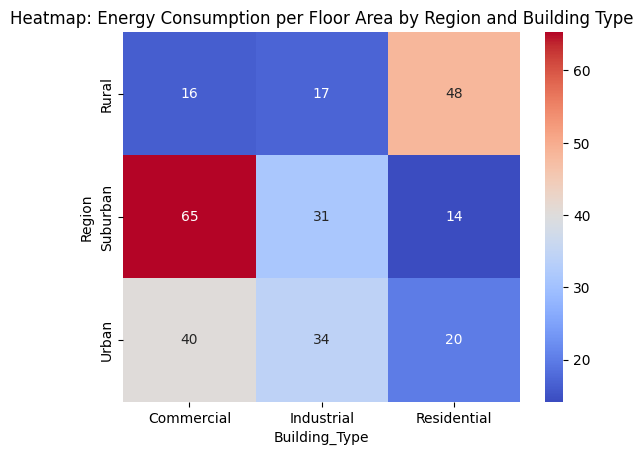

In [60]:
df_cleaned['Energy_Per_Sqm'] = df_cleaned['Energy_Consumption (kWh)'] / df_cleaned['Floor_Area (m²)']
heatmap_data = df_cleaned.pivot_table(index='Region', columns='Building_Type', values='Energy_Per_Sqm')
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True)
plt.title("Heatmap: Energy Consumption per Floor Area by Region and Building Type")
plt.show()


### Insights from Energy Consumption Analysis

I analyzed Energy Consumption per Floor Area by Region and Building Type using a heatmap, and some interesting patterns emerged:

1. **Commercial Buildings**: The highest energy use was in commercial buildings located in suburban areas. This suggests that these businesses might have higher operational demands, possibly due to extended hours and greater lighting needs.

2. **Industrial Buildings**: Urban regions showed the highest energy consumption for industrial buildings. This likely reflects the concentration of industries in cities, where energy demands are typically higher.

3. **Residential Buildings**: In contrast, rural areas had the highest energy use for residential buildings. This might indicate inefficiencies or unique energy needs in these homes.

### Conclusion

These insights highlight the need for targeted energy efficiency strategies based on building type and location. Understanding these trends can help inform better energy policies and practices to promote sustainability and reduce costs.

2. Correlation Plot: Floor Area, Occupancy Rates, and Energy Consumption

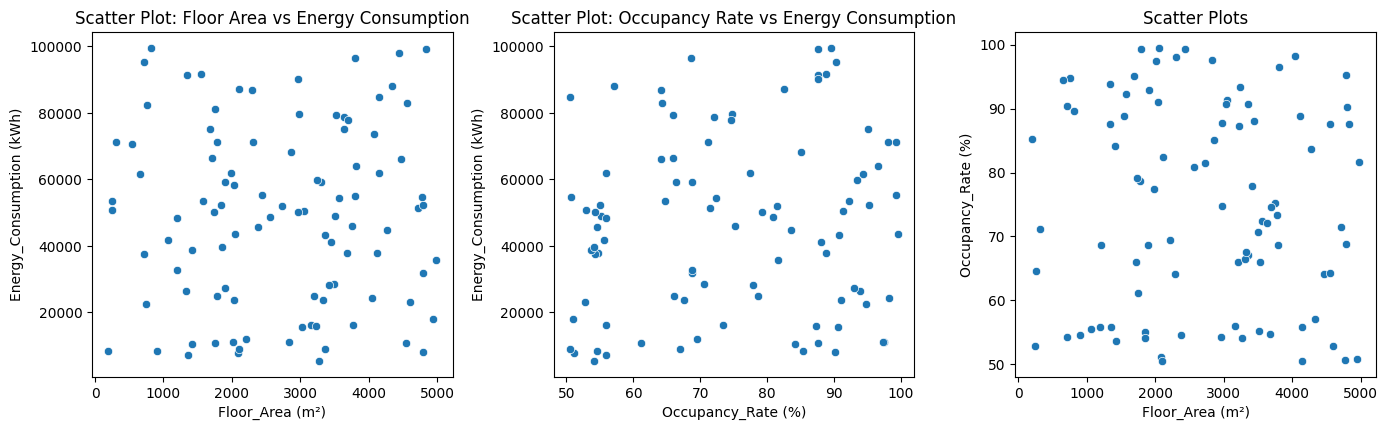

In [61]:
# Set the figure size
plt.figure(figsize=(14, 8))

# Scatter plots
plt.subplot(2, 3, 4)
sns.scatterplot(data=df_cleaned, x='Floor_Area (m²)', y='Energy_Consumption (kWh)')
plt.title('Scatter Plot: Floor Area vs Energy Consumption')

plt.subplot(2, 3, 5)
sns.scatterplot(data=df_cleaned, x='Occupancy_Rate (%)', y='Energy_Consumption (kWh)')
plt.title('Scatter Plot: Occupancy Rate vs Energy Consumption')

plt.subplot(2, 3, 6)
sns.scatterplot(data=df_cleaned, x='Floor_Area (m²)', y='Occupancy_Rate (%)')
plt.title('Scatter Plot: Floor Area vs Occupancy Rate')

# Adjust layout
plt.tight_layout()
plt.title('Scatter Plots',)
plt.show()

<ipython-input-67-00651c393659>:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=top_area, x='Floor_Area (m²)', y='Energy_Consumption (kWh)', ci=None,
<ipython-input-67-00651c393659>:28: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=top_occupancy, x='Occupancy_Rate (%)', y='Energy_Consumption (kWh)', ci=None,


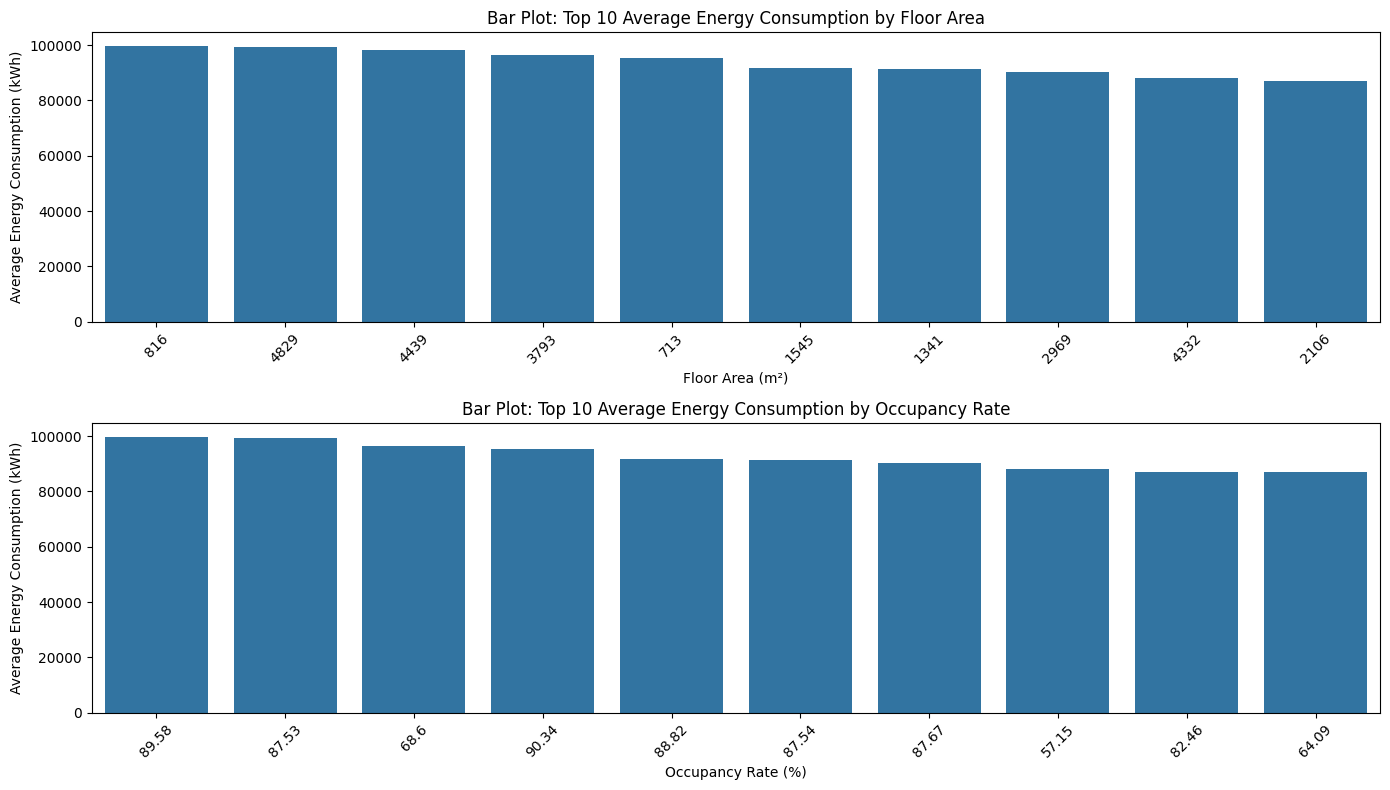

In [67]:

# Misalnya df_cleaned adalah DataFrame Anda
# Menghitung rata-rata konsumsi energi berdasarkan Floor_Area
agg_area = df_cleaned.groupby('Floor_Area (m²)', as_index=False)['Energy_Consumption (kWh)'].mean()

# Menghitung rata-rata konsumsi energi berdasarkan Occupancy_Rate
agg_occupancy = df_cleaned.groupby('Occupancy_Rate (%)', as_index=False)['Energy_Consumption (kWh)'].mean()

# Mengurutkan dan memilih 10 teratas untuk Floor Area
top_area = agg_area.sort_values(by='Energy_Consumption (kWh)', ascending=False).head(10)

# Mengurutkan dan memilih 10 teratas untuk Occupancy Rate
top_occupancy = agg_occupancy.sort_values(by='Energy_Consumption (kWh)', ascending=False).head(10)

# Set the figure size
plt.figure(figsize=(14, 8))

# Bar plot untuk 10 teratas Floor Area vs Energy Consumption
plt.subplot(2, 1, 1)
sns.barplot(data=top_area, x='Floor_Area (m²)', y='Energy_Consumption (kWh)', ci=None,
            order=top_area['Floor_Area (m²)'])
plt.title('Bar Plot: Top 10 Average Energy Consumption by Floor Area')
plt.xlabel('Floor Area (m²)')
plt.ylabel('Average Energy Consumption (kWh)')
plt.xticks(rotation=45)

# Bar plot untuk 10 teratas Occupancy Rate vs Energy Consumption
plt.subplot(2, 1, 2)
sns.barplot(data=top_occupancy, x='Occupancy_Rate (%)', y='Energy_Consumption (kWh)', ci=None,
            order=top_occupancy['Occupancy_Rate (%)'])
plt.title('Bar Plot: Top 10 Average Energy Consumption by Occupancy Rate')
plt.xlabel('Occupancy Rate (%)')
plt.ylabel('Average Energy Consumption (kWh)')
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()


The bar plot visualization reveals significant insights into energy consumption patterns based on floor area and occupancy rate. It is evident that the floor area with the highest average energy consumption is 816 m². This suggests that larger spaces may require more energy for heating, cooling, and other operational needs.

Additionally, when examining occupancy rates, the data indicates that the highest average energy consumption occurs at an occupancy rate of 89.58%. This finding implies that as occupancy increases, energy consumption also rises, potentially due to the higher demand for lighting, heating, and electrical appliances.

These insights can inform energy management strategies, highlighting the importance of monitoring both floor area and occupancy levels to optimize energy efficiency in buildings.



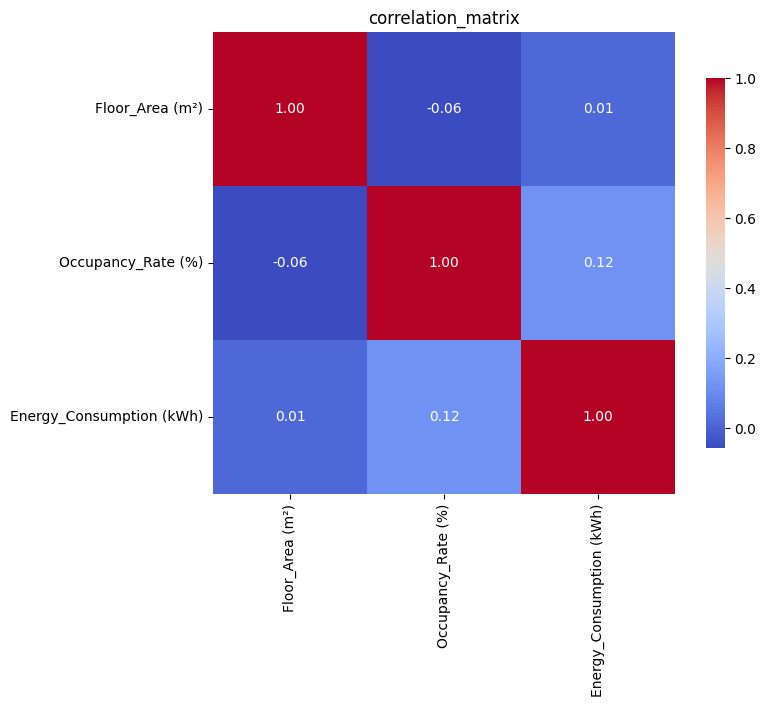

In [63]:
correlation_matrix = df_cleaned[['Floor_Area (m²)', 'Occupancy_Rate (%)', 'Energy_Consumption (kWh)']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar_kws={"shrink": .8})
plt.title('correlation_matrix')
plt.show()

3. Energy Consumption Trend by Region and Building Type Over Time

<Figure size 300x300 with 0 Axes>

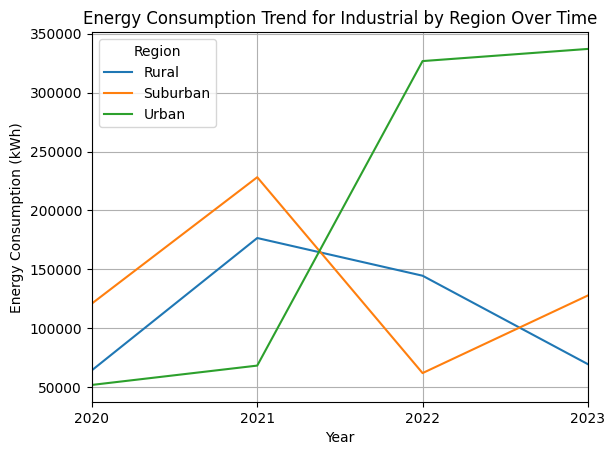

<Figure size 300x300 with 0 Axes>

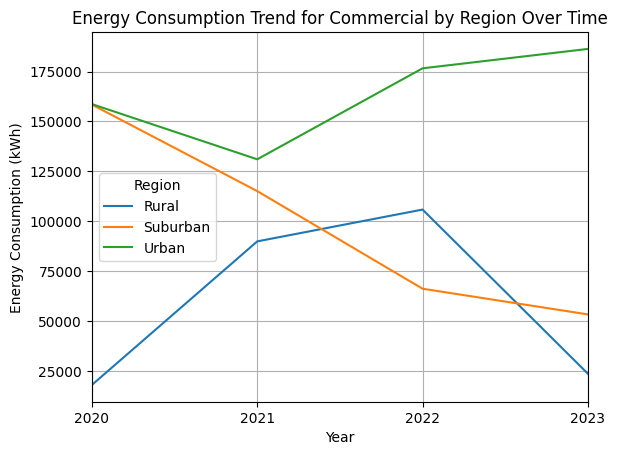

<Figure size 300x300 with 0 Axes>

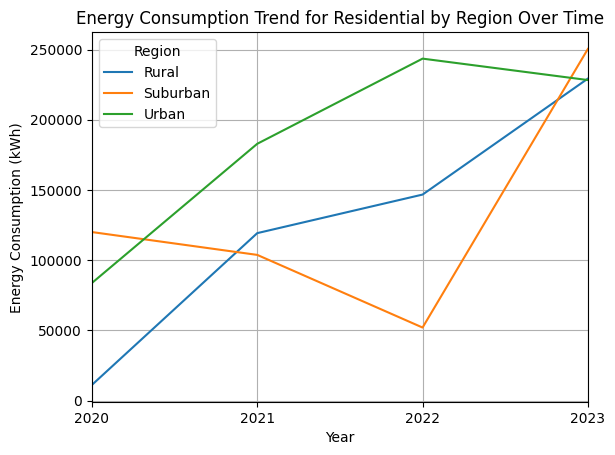

In [64]:
df_cleaned['Year'] = pd.to_datetime(df['Year'], format='%Y')

building_types = ['Industrial', 'Commercial', 'Residential']

# Membuat visualisasi terpisah untuk setiap jenis bangunan
for building_type in building_types:
    plt.figure(figsize=(3, 3))
    df_cleaned[df_cleaned['Building_Type'] == building_type].groupby(['Year', 'Region'])['Energy_Consumption (kWh)'].sum().unstack().plot()
    plt.title(f"Energy Consumption Trend for {building_type} by Region Over Time")
    plt.xlabel("Year")
    plt.ylabel("Energy Consumption (kWh)")
    plt.legend(title='Region')
    plt.grid(True)
    plt.show()


### Insights from Energy Consumption Trend Analysis

In the Energy Consumption Trend analysis from 2020 to 2023, several key patterns emerged:

1. **Industrial Buildings in Urban Regions**: Energy consumption increased significantly, especially between 2021 and 2022, indicating rising demand likely due to expanded industrial activities.

2. **Commercial Buildings in Suburban Regions**: There was a decline in energy use, suggesting potential improvements in energy efficiency or reduced commercial activity.

3. **Residential Buildings Across All Regions**: Energy consumption consistently rose, reflecting growing household energy needs, possibly due to increased time at home and higher appliance use.

### Conclusion

These trends highlight the varying energy demands across building types and regions, underscoring the need for targeted energy management strategies.

#4 Share your thoughts and experiences

During my analysis, I encountered several interesting challenges and insights.

First, I noticed an anomaly in the Floor_Area column, where some values were negative. After analyzing this issue, I determined that these negative values were likely input errors. Since it's illogical for a physical area to be negative, I converted these values to positive.

Second, I discovered significant outliers in the Energy_Consumption column, with one value reaching an astonishing 2,000,000 kWh. This outlier had a considerable impact on my analysis, so I decided to remove it. However, I chose to retain other outliers that didn't significantly influence the results. I experimented with two approaches: one where I only removed the outlier at index 82 and another where I eliminated all outliers. Interestingly, I found that neither approach drastically affected the overall analysis.

Additionally, I had to address the Average_Temp column, which contained values in both Celsius and Fahrenheit. I first converted the Fahrenheit values to Celsius before removing the '⁰ C' character, ensuring consistency in the data format.

Lastly, I identified that there were 8 missing values in the Occupancy Rate column. To handle these, I filled the missing entries with the median value, which I believe is a reasonable approach to maintain data integrity.

Overall, these experiences have highlighted the importance of data cleaning and preprocessing in ensuring accurate analysis.